<a href="https://colab.research.google.com/github/CamisSensa/CamisSensa.github.io/blob/master/Ifood_case_Camila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Case Ifood - Camila Cardoso 2024-05

In [ ]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install seaborn


Carregando Base de Dados

In [ ]:
# Importando arquivo
arq = 'ml_project1_data.csv'

DB = pd.read_csv(arq)

# Pré-visualização
DB.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


Verificação de valores nulos e tratamento de outliers:

In [ ]:
# Verificando valores nulos
print("Valores nulos por coluna:")
print(DB.isnull().sum())

# Tratamento de outliers (se necessário)
# Se houver necessidade de tratar outliers, podemos discutir quais técnicas seriam mais apropriadas.


Valores nulos por coluna:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


Preenchimento so valores Nulos

In [ ]:
# Preenchendo os valores nulos na coluna 'Income' com a mediana
DB['Income'].fillna(DB['Income'].median(), inplace=True)

# Verificando se ainda há valores nulos
print("Valores nulos por coluna após o tratamento:")
print(DB.isnull().sum())


Valores nulos por coluna após o tratamento:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


Análise Demográfica:

In [ ]:
# Análise do estado civil
print("Distribuição do estado civil:")
print(DB['Marital_Status'].value_counts())

# Análise do nível de educação
print("\nDistribuição do nível de educação:")
print(DB['Education'].value_counts())

# Estatísticas descritivas da renda
print("\nEstatísticas descritivas da renda:")
print(DB['Income'].describe())


Distribuição do estado civil:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Distribuição do nível de educação:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Estatísticas descritivas da renda:
count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64


Estado Civil: A maioria dos clientes é casada (864), seguida por aqueles que estão juntos (580) e solteiros (480). Também temos um número significativo de clientes divorciados (232) e viúvos (77). Além disso, parece haver algumas entradas incomuns, como "Alone", "Absurd" e "YOLO", que podem ser erros de entrada de dados.

Nível de Educação: A maioria dos clientes tem formação em Graduação (1127), seguida por PhD (486) e Mestrado (370). Existem também clientes com formação em 2º Ciclo (203) e Básico (54).

Renda: As estatísticas descritivas mostram que a renda média dos clientes é de aproximadamente 52.238,00, com uma grande variação. A mediana da renda está em torno de 51.382,00, o que indica que a distribuição da renda é relativamente simétrica. No entanto, o desvio padrão é alto (aproximadamente 25.038,00), o que sugere uma grande dispersão nos valores de renda. Além disso, temos um valor máximo bastante alto (666.666,00), que pode ser um outlier.

<ipython-input-6-c5c5c8bb13f3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital_Status', data=DB, order=DB['Marital_Status'].value_counts().index, palette='Set2')


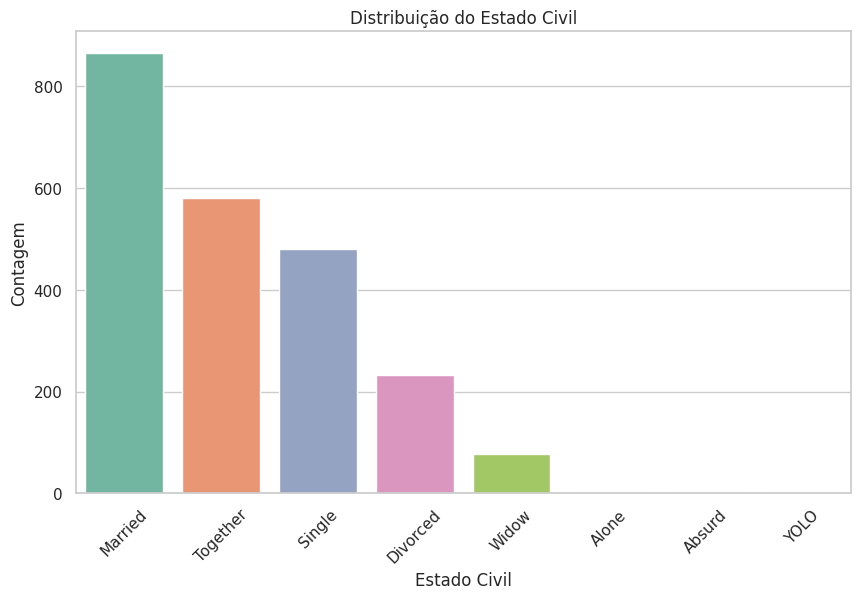

<ipython-input-6-c5c5c8bb13f3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=DB, order=DB['Education'].value_counts().index, palette='Set2')


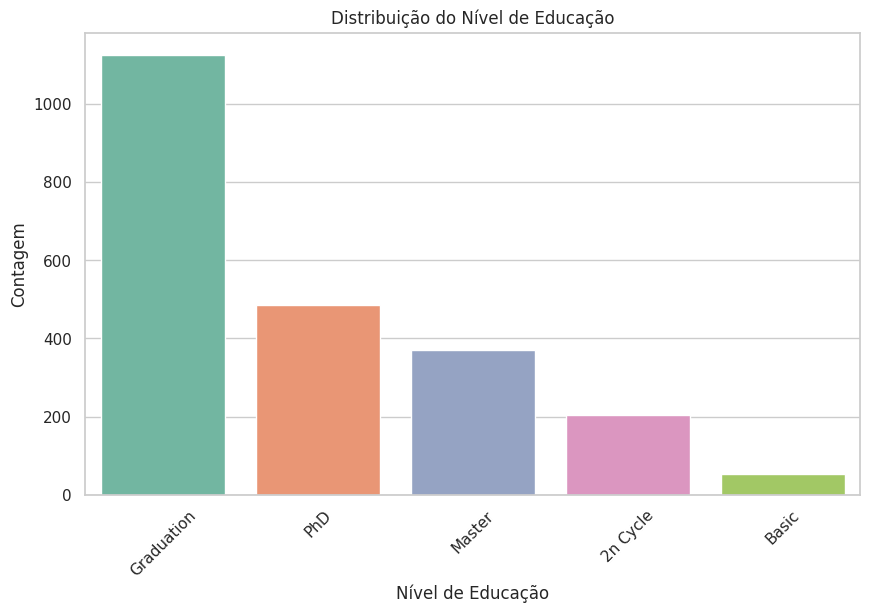

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo dos gráficos
sns.set(style="whitegrid")

# Gráfico de barras para distribuição do estado civil
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=DB, order=DB['Marital_Status'].value_counts().index, palette='Set2')
plt.title('Distribuição do Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para distribuição do nível de educação
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=DB, order=DB['Education'].value_counts().index, palette='Set2')
plt.title('Distribuição do Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()


Estatísticas Descritivas do Consumo:

In [ ]:
# Selecionando as colunas relacionadas ao consumo
consumption_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProds', 'Income']

# Criando um DataFrame para análise de consumo
consumption_data = DB[consumption_cols]

# Calculando estatísticas descritivas para as variáveis de consumo
consumption_desc = consumption_data.describe()

# Transpondo o DataFrame para facilitar a leitura
consumption_desc = consumption_desc.transpose()

# Exibindo as estatísticas descritivas
print("Estatísticas Descritivas do Consumo:")
print(consumption_desc)


Estatísticas Descritivas do Consumo:
                   count          mean           std     min       25%  \
MntWines          2240.0    303.935714    336.597393     0.0     23.75   
MntFruits         2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts   2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts   2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts  2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds      2240.0     44.021875     52.167439     0.0      9.00   
Income            2240.0  52237.975446  25037.955891  1730.0  35538.75   

                      50%       75%       max  
MntWines            173.5    504.25    1493.0  
MntFruits             8.0     33.00     199.0  
MntMeatProducts      67.0    232.00    1725.0  
MntFishProducts      12.0     50.00     259.0  
MntSweetProducts      8.0     33.00     263.0  
MntGoldProds         24.0     56.00     362.0  
Income            51381.5  68289.7

Relação entre Estado Civil e Consumo:

In [ ]:
# Criando um DataFrame para análise de consumo por estado civil
consumption_marital = pd.concat([consumption_data, DB['Marital_Status']], axis=1)

# Calculando as estatísticas descritivas para cada categoria de estado civil
consumption_marital_desc = consumption_marital.groupby('Marital_Status').describe()

# Transpondo o DataFrame para facilitar a leitura
consumption_marital_desc = consumption_marital_desc.transpose()

# Exibindo as estatísticas descritivas
print("Estatísticas Descritivas do Consumo por Estado Civil:")
print(consumption_marital_desc)


Estatísticas Descritivas do Consumo por Estado Civil:
Marital_Status                Absurd         Alone       Divorced  \
MntWines         count      2.000000      3.000000     232.000000   
                 mean     355.500000    184.666667     324.844828   
                 std      163.341666    302.572856     347.097304   
                 min      240.000000      5.000000       0.000000   
                 25%      297.750000     10.000000      23.000000   
                 50%      355.500000     15.000000     182.500000   
                 75%      413.250000    274.500000     565.750000   
                 max      471.000000    534.000000    1459.000000   
MntFruits        count      2.000000      3.000000     232.000000   
                 mean      84.500000      4.000000      27.426724   
                 std       24.748737      3.605551      40.196743   
                 min       67.000000      0.000000       0.000000   
                 25%       75.750000      2.50000

Visualização Gráfica dos Padrões de Consumo por Estado Civil:

<ipython-input-9-dbaa3c983cf3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Marital_Status', y='MntWines', data=consumption_marital, palette='Set2')


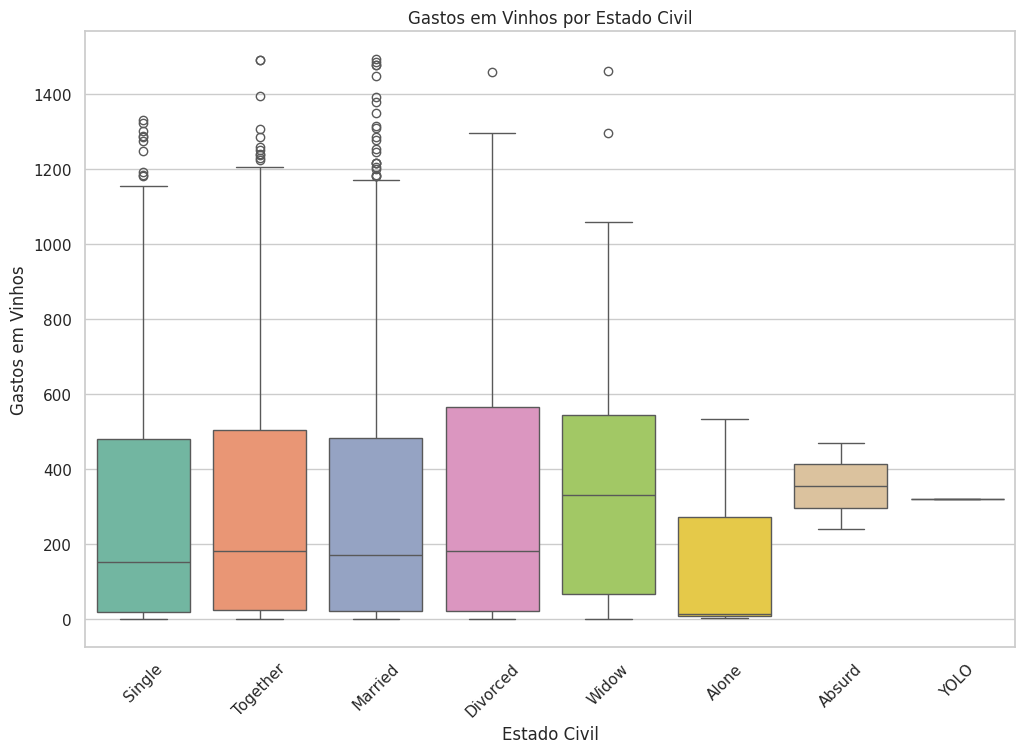

<ipython-input-9-dbaa3c983cf3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Marital_Status', y='MntMeatProducts', data=consumption_marital, palette='Set2')


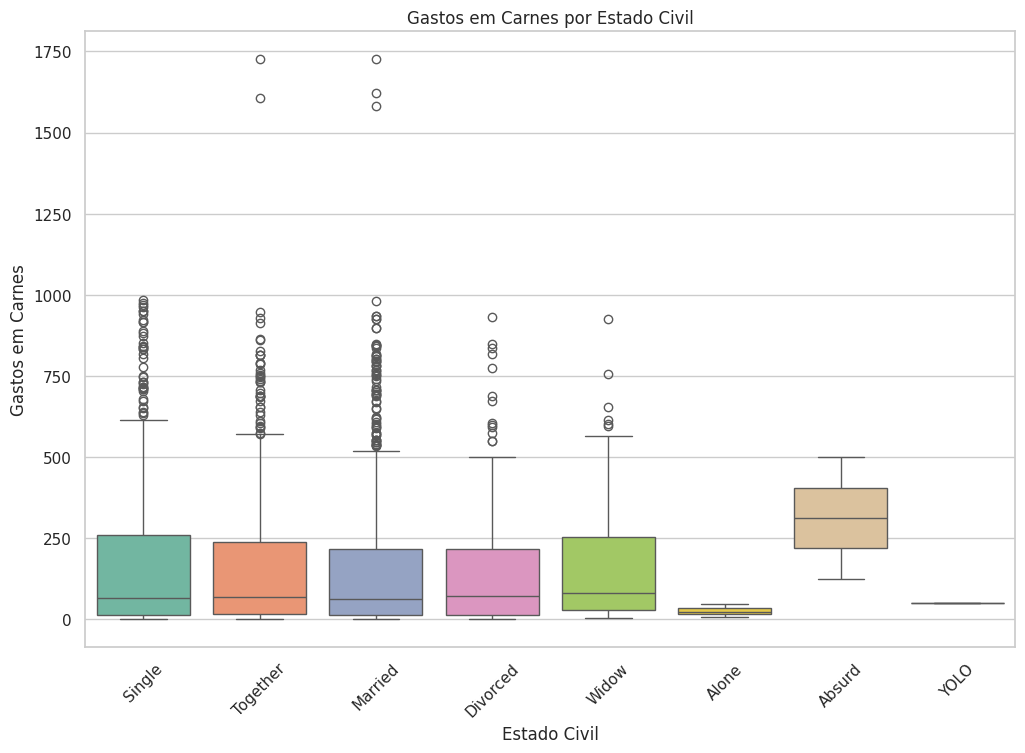

<ipython-input-9-dbaa3c983cf3>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Marital_Status', y='MntGoldProds', data=consumption_marital, palette='Set2')


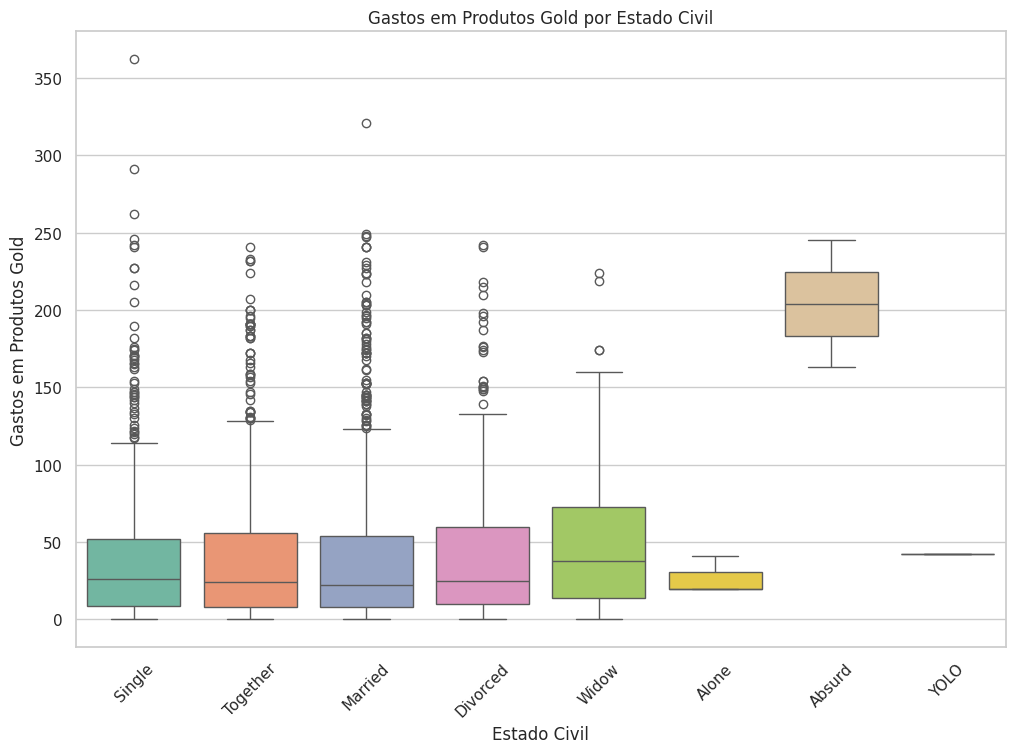

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=(12, 8))

# Criando o boxplot para cada categoria de produto
sns.boxplot(x='Marital_Status', y='MntWines', data=consumption_marital, palette='Set2')
plt.title('Gastos em Vinhos por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Gastos em Vinhos')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Marital_Status', y='MntMeatProducts', data=consumption_marital, palette='Set2')
plt.title('Gastos em Carnes por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Gastos em Carnes')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Marital_Status', y='MntGoldProds', data=consumption_marital, palette='Set2')
plt.title('Gastos em Produtos Gold por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Gastos em Produtos Gold')
plt.xticks(rotation=45)
plt.show()


Observações:

Viúvos (Widow): Parece que os viúvos tendem a gastar mais em vinhos, carnes e produtos gold em comparação com outros grupos de estado civil. A média de renda dos viúvos também é relativamente alta.

YOLO: Este parece ser um grupo incomum com apenas 2 observações. Eles têm padrões de consumo muito específicos, como gastar uma quantidade considerável em vinhos e carnes, enquanto gastam menos em frutas e produtos gold.

Análise de Padrões Comportamentais:

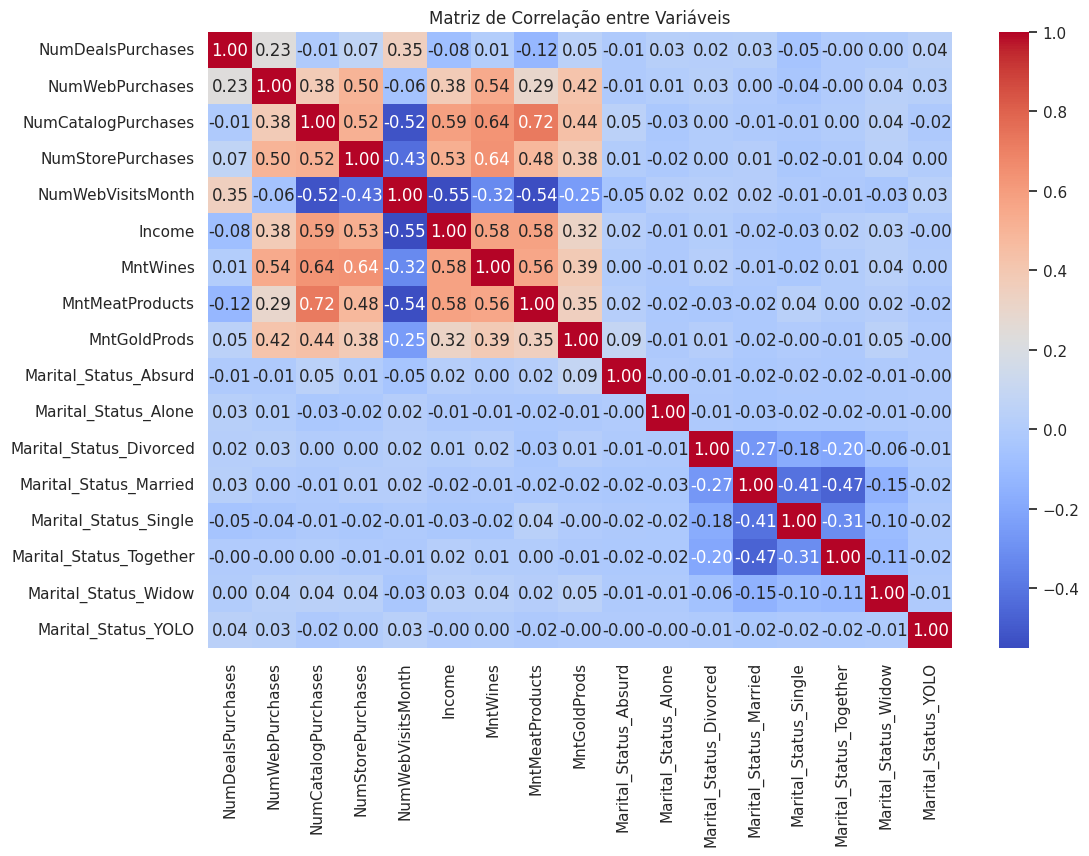

In [ ]:
# Codificar a coluna 'Marital_Status' usando one-hot encoding
behavior_data_encoded = pd.get_dummies(behavior_data, columns=['Marital_Status'])

# Calculando a matriz de correlação
correlation_matrix = behavior_data_encoded.corr()

# Visualizando a matriz de correlação usando um mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis')
plt.show()


In [ ]:
# Selecionando as colunas relacionadas ao comportamento do cliente, incluindo 'Marital_Status'
behavior_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                 'NumWebVisitsMonth', 'Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'Marital_Status']

# Criando um DataFrame para análise de comportamento
behavior_data = DB[behavior_cols]

# Convertendo a variável categórica 'Marital_Status' em variáveis dummy
behavior_data = pd.get_dummies(behavior_data, columns=['Marital_Status'])

# Calculando a matriz de correlação
correlation_matrix = behavior_data.corr()

# Convertendo a matriz de correlação em formato de texto
correlation_text = correlation_matrix.to_string()

# Exibindo a matriz de correlação em formato de texto
print(correlation_text)


                         NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth    Income  MntWines  MntMeatProducts  MntGoldProds  Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO
NumDealsPurchases                 1.000000         0.234185            -0.008617           0.068879           0.347633 -0.082315  0.010940        -0.122415      0.049085              -0.005029              0.025434                 0.019416                0.027631              -0.052377                -0.000264              0.001237             0.041395
NumWebPurchases                   0.234185         1.000000             0.378376           0.502713          -0.055846  0.380554  0.542265         0.293761      0.421836              -0.006293              0.012064                 0.027594                0.000896              -0.039834    

NumDealsPurchases vs. NumWebPurchases (0.234): Existe uma correlação positiva fraca entre o número de compras feitas com desconto e o número de compras feitas pela web. Isso sugere que clientes que realizam mais compras com desconto também tendem a fazer mais compras online.

NumWebPurchases vs. NumCatalogPurchases (0.378): Existe uma correlação positiva moderada entre o número de compras online e o número de compras feitas através de catálogos. Isso indica que clientes que compram mais online também tendem a comprar mais através de catálogos.

NumStorePurchases vs. NumWebVisitsMonth (-0.429): Há uma correlação negativa moderada entre o número de compras feitas em lojas físicas e o número de visitas ao site por mês. Isso sugere que clientes que visitam mais o site tendem a fazer menos compras em lojas físicas, e vice-versa.

Income vs. NumWebVisitsMonth (-0.550): Existe uma correlação negativa moderada entre a renda dos clientes e o número de visitas ao site por mês. Isso pode indicar que clientes com renda mais alta tendem a visitar menos o site, possivelmente realizando mais compras em lojas físicas ou por outros meios.

In [ ]:
# Selecionando as colunas relacionadas ao comportamento do cliente, incluindo 'Marital_Status'
behavior_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                 'NumWebVisitsMonth', 'Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds']

# Criando um DataFrame para análise de comportamento
behavior_data = DB[behavior_cols]

# Convertendo a variável categórica 'Marital_Status' em variáveis dummy
behavior_data = pd.get_dummies(behavior_data)

# Removendo a coluna 'Marital_Status'
if 'Marital_Status' in behavior_data.columns:
    behavior_data.drop('Marital_Status', axis=1, inplace=True)

# Calculando a matriz de correlação
correlation_matrix = behavior_data.corr()

# Convertendo a matriz de correlação em formato de texto
correlation_text = correlation_matrix.to_string()

# Exibindo a matriz de correlação em formato de texto
print(correlation_text)



                     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth    Income  MntWines  MntMeatProducts  MntGoldProds
NumDealsPurchases             1.000000         0.234185            -0.008617           0.068879           0.347633 -0.082315  0.010940        -0.122415      0.049085
NumWebPurchases               0.234185         1.000000             0.378376           0.502713          -0.055846  0.380554  0.542265         0.293761      0.421836
NumCatalogPurchases          -0.008617         0.378376             1.000000           0.518738          -0.520364  0.586826  0.635226         0.723827      0.437697
NumStorePurchases             0.068879         0.502713             0.518738           1.000000          -0.428473  0.526600  0.642100         0.479659      0.381678
NumWebVisitsMonth             0.347633        -0.055846            -0.520364          -0.428473           1.000000 -0.549785 -0.320653        -0.539470     -0.250719
Inco

In [ ]:
# Exibindo as colunas do DataFrame behavior_data antes da conversão
print(behavior_data.columns)


Index(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Income', 'MntWines',
       'MntMeatProducts', 'MntGoldProds'],
      dtype='object')


Etapa da Segmentação

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

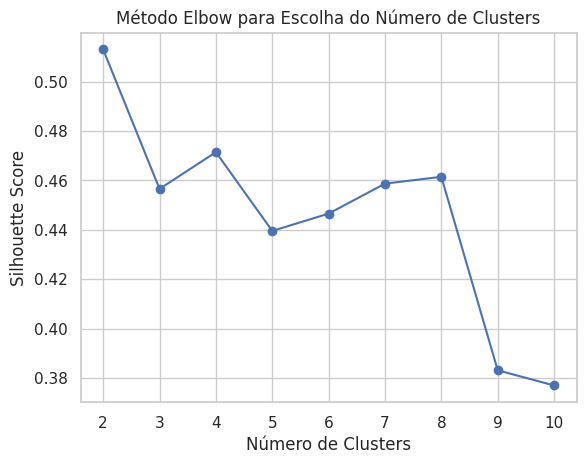

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


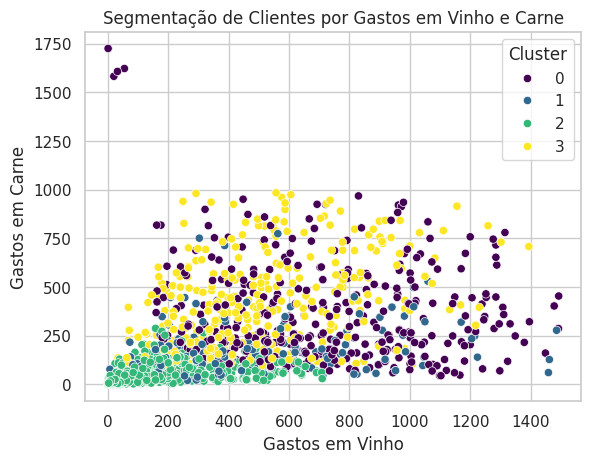

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecionar as variáveis relevantes para a segmentação
features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Filtrar o dataframe com as variáveis selecionadas
X = DB[features]

# Normalizar os dados para garantir que todas as variáveis tenham a mesma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Escolher o número ideal de clusters
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotar o gráfico do método Elbow para escolher o número ideal de clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Método Elbow para Escolha do Número de Clusters')
plt.show()

# Escolher o número de clusters com base no ponto de inflexão do gráfico
# Neste exemplo, o ponto de inflexão parece estar em k=4

# Executar o K-means com o número ideal de clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
DB['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar os clusters
sns.scatterplot(data=DB, x='MntWines', y='MntMeatProducts', hue='Cluster', palette='viridis')
plt.title('Segmentação de Clientes por Gastos em Vinho e Carne')
plt.xlabel('Gastos em Vinho')
plt.ylabel('Gastos em Carne')
plt.show()


Análise das características médias

In [ ]:
# Selecionar apenas as colunas numéricas
numeric_columns = DB.select_dtypes(include=['int64', 'float64'])

# Calcular as médias para cada cluster
cluster_means = DB.groupby('Cluster')[numeric_columns.columns].mean()
print(cluster_means)


                  ID   Year_Birth        Income   Kidhome  Teenhome  \
Cluster                                                               
0        5661.405612  1966.405612  71772.290816  0.102041  0.446429   
1        5571.713592  1967.063107  58876.485437  0.194175  0.684466   
2        5599.154973  1969.766384  39530.314572  0.689283  0.557440   
3        5499.391304  1968.962319  73852.037681  0.060870  0.275362   

           Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                       
0        49.594388  717.056122  35.826531       366.737245        53.158163   
1        51.980583  475.626214  26.033981       170.776699        32.325243   
2        48.734002   96.339244   6.353123        35.407864         8.926754   
3        48.255072  512.460870  90.637681       432.182609       130.382609   

         ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Cluster  ...         

Visualização dos Clusters

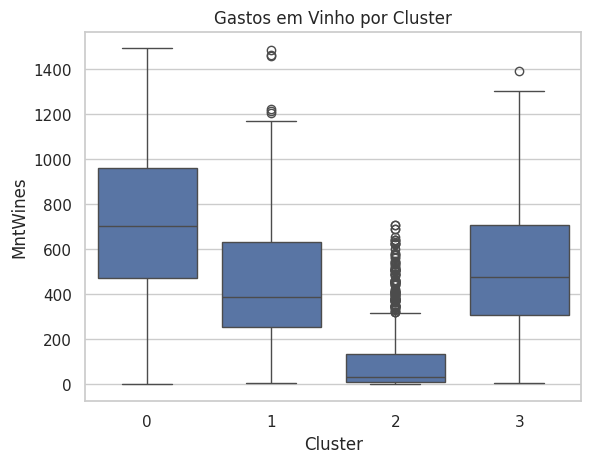

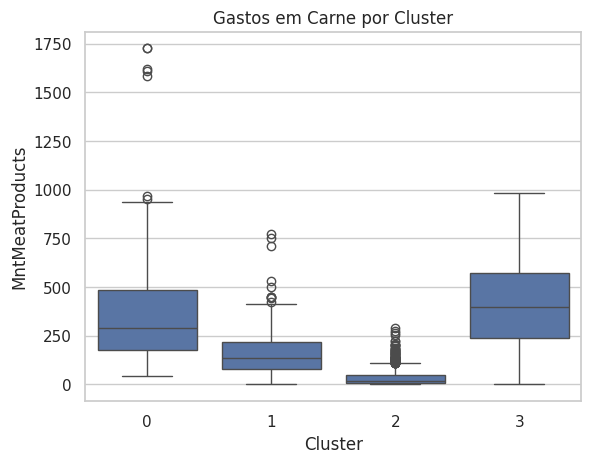

In [ ]:
sns.boxplot(data=DB, x='Cluster', y='MntWines')
plt.title('Gastos em Vinho por Cluster')
plt.show()

sns.boxplot(data=DB, x='Cluster', y='MntMeatProducts')
plt.title('Gastos em Carne por Cluster')
plt.show()


In [ ]:
cluster_counts = DB['Cluster'].value_counts(normalize=True)
print(cluster_counts)


Cluster
2    0.579018
0    0.175000
3    0.154018
1    0.091964
Name: proportion, dtype: float64


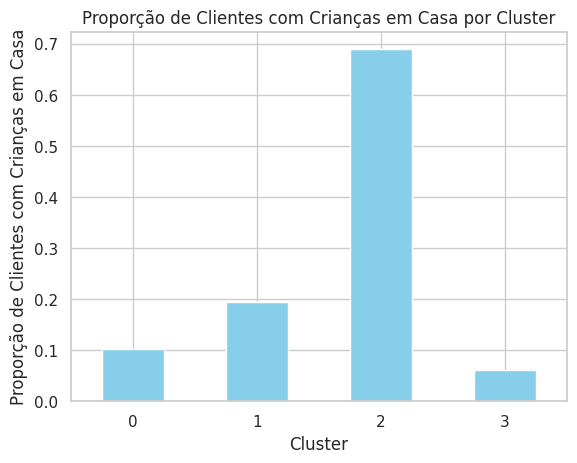

In [ ]:
# Calcular a proporção de clientes com crianças em casa em cada cluster
kidhome_proportions = DB.groupby('Cluster')['Kidhome'].mean()

# Visualizar as proporções
kidhome_proportions.plot(kind='bar', color='skyblue')
plt.title('Proporção de Clientes com Crianças em Casa por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporção de Clientes com Crianças em Casa')
plt.xticks(rotation=0)
plt.show()


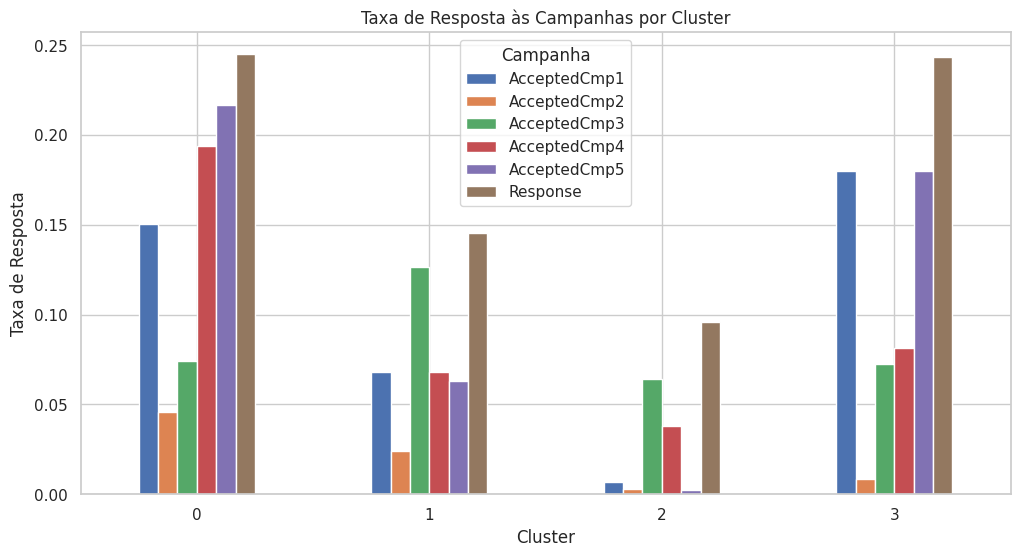

In [ ]:
# Selecionar as colunas relevantes das campanhas
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Calcular as taxas de resposta às campanhas em cada cluster
response_rates = {}
for campaign_col in campaign_cols:
    response_rates[campaign_col] = DB.groupby('Cluster')[campaign_col].mean()

# Converter em DataFrame para visualização
response_rates_df = pd.DataFrame(response_rates)

# Visualizar as taxas de resposta às campanhas por cluster
response_rates_df.plot(kind='bar', figsize=(12, 6))
plt.title('Taxa de Resposta às Campanhas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Taxa de Resposta')
plt.xticks(rotation=0)
plt.legend(title='Campanha')
plt.show()


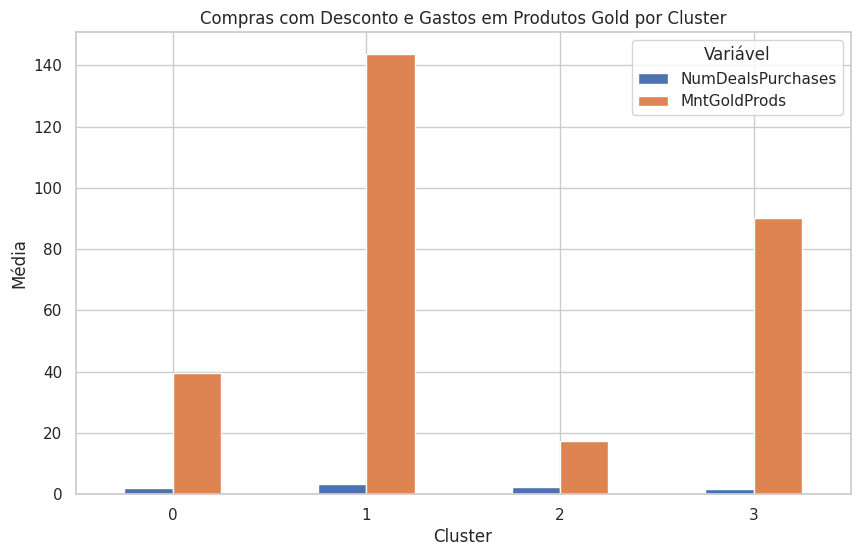

In [ ]:
# Selecionar as colunas relevantes
discount_cols = ['NumDealsPurchases', 'MntGoldProds']

# Calcular estatísticas descritivas para cada cluster
discount_stats = DB.groupby('Cluster')[discount_cols].mean()

# Visualizar as estatísticas
discount_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Compras com Desconto e Gastos em Produtos Gold por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média')
plt.xticks(rotation=0)
plt.legend(title='Variável')
plt.show()


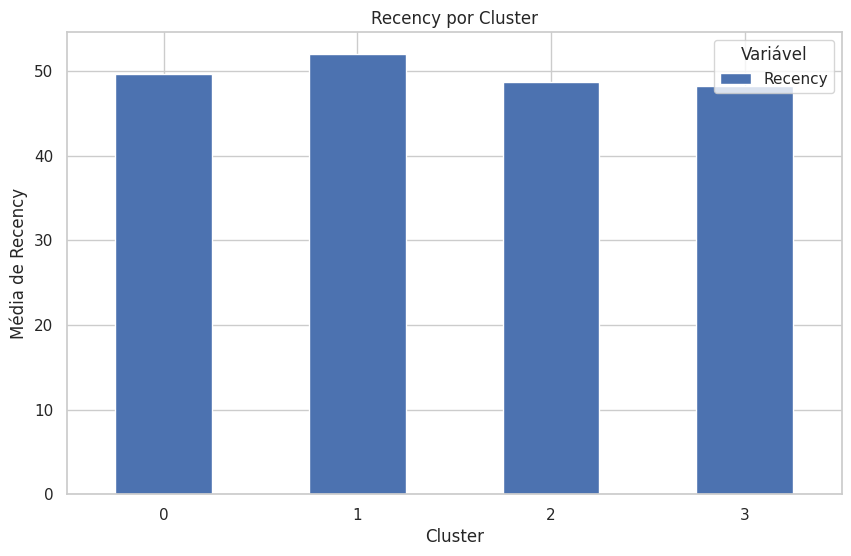

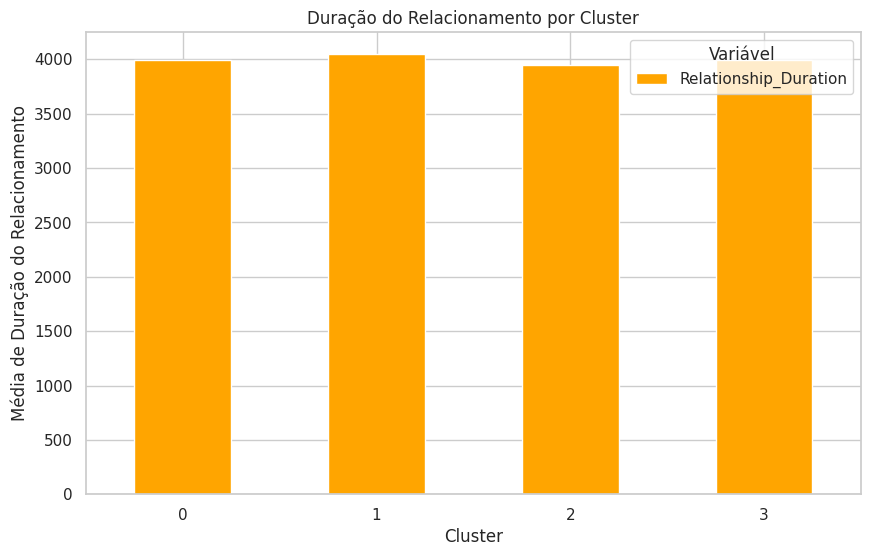

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Transformar a variável 'Dt_Customer' em tempo de relacionamento com a empresa
DB['Dt_Customer'] = pd.to_datetime(DB['Dt_Customer'])
DB['Relationship_Duration'] = (pd.Timestamp.now() - DB['Dt_Customer']).dt.days

# Selecionar as colunas relevantes
recency_cols = ['Recency']
relationship_cols = ['Relationship_Duration']

# Calcular estatísticas descritivas para cada cluster
recency_stats = DB.groupby('Cluster')[recency_cols].mean()
relationship_stats = DB.groupby('Cluster')[relationship_cols].mean()

# Visualizar as estatísticas de Recency
plt.figure(figsize=(10, 6))
recency_stats.plot(kind='bar', ax=plt.gca())
plt.title('Recency por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média de Recency')
plt.xticks(rotation=0)
plt.legend().set_title('Variável')
plt.show()

# Visualizar as estatísticas de Relationship_Duration
plt.figure(figsize=(10, 6))
relationship_stats.plot(kind='bar', ax=plt.gca(), color='orange')
plt.title('Duração do Relacionamento por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média de Duração do Relacionamento')
plt.xticks(rotation=0)
plt.legend().set_title('Variável')
plt.show()


Clientes Novos

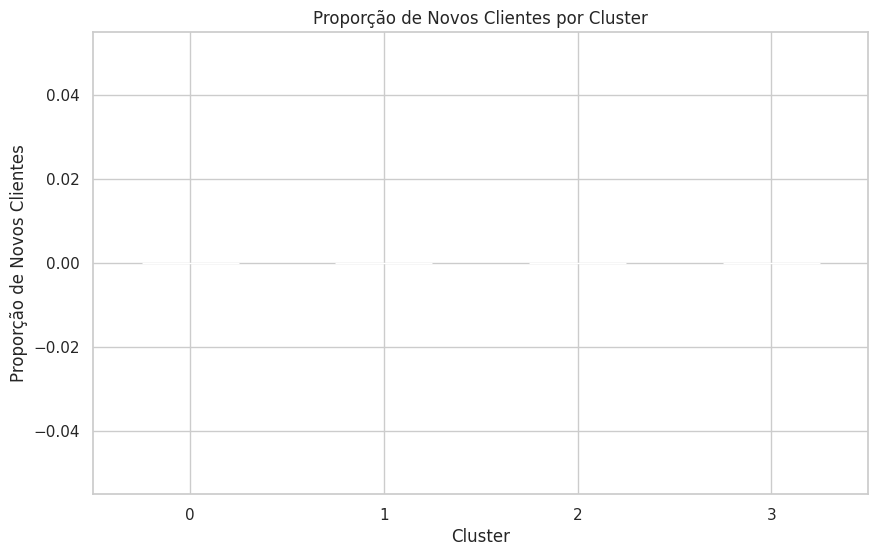

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtro para clientes com menos de 3 meses de relacionamento
new_customers_filter = DB['Relationship_Duration'] < 120  #  dias representam 2 meses

# Aplicando o filtro
new_customers = DB[new_customers_filter]

# Contando o número de novos clientes em cada cluster
new_customers_per_cluster = new_customers.groupby('Cluster').size()

# Contando o número total de clientes em cada cluster
total_customers_per_cluster = DB.groupby('Cluster').size()

# Calculando a proporção de novos clientes em cada cluster
proportion_new_customers_per_cluster = new_customers_per_cluster / total_customers_per_cluster

# Plotando o gráfico de proporção de novos clientes por cluster
proportion_new_customers_per_cluster.plot(kind='bar', figsize=(10, 6))
plt.title('Proporção de Novos Clientes por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporção de Novos Clientes')
plt.xticks(rotation=0)
plt.show()


In [48]:
min_entry_date = DB['Dt_Customer'].min()
print("Data mínima de entrada:", min_entry_date)


Data mínima de entrada: 2012-07-30 00:00:00


Fingindo que estamos no ano de 2012 para ver relacao com novos clientes

In [49]:
from datetime import datetime

# Converter a coluna Dt_Customer para o tipo datetime
DB['Dt_Customer'] = pd.to_datetime(DB['Dt_Customer'])

# Definir a data atual como 2012
current_date = datetime(2012, 12, 31)

# Calcular a diferença em dias entre a data atual e a data de entrada
DB['Days_Relationship'] = (current_date - DB['Dt_Customer']).dt.days

# Verificar os clientes que têm menos de 2 meses de relacionamento (60 dias)
new_customers = DB[DB['Days_Relationship'] <= 60]

# Contar o número de novos clientes em cada cluster
new_customers_by_cluster = new_customers.groupby('Cluster').size()

print("Número de novos clientes por cluster:")
print(new_customers_by_cluster)


Número de novos clientes por cluster:
Cluster
0     327
1     165
2    1147
3     287
dtype: int64


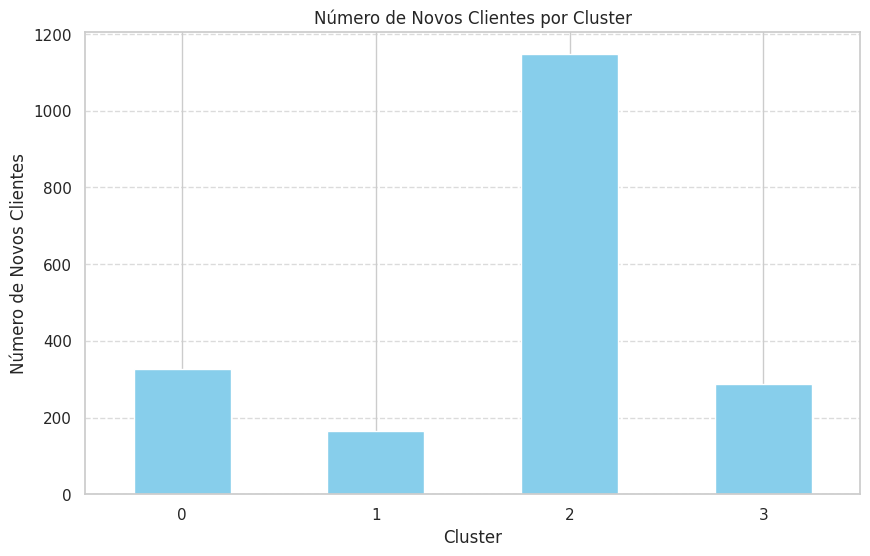

In [50]:
import matplotlib.pyplot as plt

# Plotar o número de novos clientes por cluster
new_customers_by_cluster.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Número de Novos Clientes por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Novos Clientes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Cluster 0: Clientes mais velhos, com uma renda relativamente alta e um número moderado de crianças em casa. Gastam mais em vinhos, carne e produtos gold. São mais responsivos às campanhas de marketing, especialmente a primeira e a quinta. Estratégias de marketing podem enfatizar a qualidade dos produtos e serviços premium, oferecendo promoções exclusivas e eventos especiais para fidelização.

Cluster 1: Clientes um pouco mais jovens, também com uma renda alta, mas com mais crianças em casa do que o Cluster 0. Gastam mais em vinhos, mas menos em outras categorias de produtos. São responsivos a campanhas de marketing, especialmente a primeira. Estratégias de marketing podem incluir promoções em produtos premium, especialmente em pacotes familiares, e enfatizar o valor agregado dos produtos.

Cluster 2: Clientes mais jovens, com uma renda mais baixa e um número significativo de crianças em casa. Gastam menos em todas as categorias de produtos. São menos responsivos às campanhas de marketing. Estratégias de marketing podem incluir ofertas especiais em produtos do dia a dia e promoções direcionadas através de canais digitais e redes sociais. São também um  cluster de clientes novos. Precisamos trabalhar o onbording deles.

Cluster 3: Clientes mais velhos, com uma renda relativamente alta e poucas crianças em casa. Gastam significativamente mais em todas as categorias de produtos, especialmente em produtos gold. São altamente responsivos a todas as campanhas de marketing. Estratégias de marketing podem focar em produtos premium e de alta qualidade, oferecendo descontos exclusivos e recompensas para clientes fiéis.

Estratégias de Marketing:

Personalizar campanhas de marketing para cada segmento, adaptando as mensagens e ofertas com base no perfil e comportamento de compra de cada cluster.
Investir em estratégias digitais e nas redes sociais para alcançar os clientes do Cluster 2, enquanto mantém abordagens tradicionais para os outros grupos.
Criar pacotes promocionais e ofertas exclusivas para clientes do Cluster 0 e 3, que são mais sensíveis a produtos premium e estão dispostos a gastar mais.
Monitorar continuamente o comportamento dos clusters e ajustar as estratégias de marketing conforme necessário para garantir a eficácia e a relevância.

Próximos passos - Lembrando que nao temos o histórico

Avaliar o desempenho das campanhas anteriores: Analise o desempenho das campanhas de marketing anteriores em relação aos diferentes segmentos de clientes identificados. Identifique quais campanhas foram mais eficazes em cada grupo e as razões por trás disso. Isso ajudará a ajustar as futuras estratégias de marketing.

Implementar testes e experimentos: Realize testes e experimentos para validar suas hipóteses e aprimorar suas estratégias de marketing. Isso pode incluir testes A/B, testes de mensagens, ofertas ou canais de comunicação, entre outros.

Monitorar e medir resultados: Acompanhe de perto o desempenho das novas estratégias de marketing implementadas. Meça os resultados regularmente e ajuste suas táticas com base nos dados e feedbacks recebidos.

MCA - tentativa de uma metodologia nova - Prõximos passos

In [ ]:
pip install prince

In [ ]:
import pandas as pd
from prince import MCA
import matplotlib.pyplot as plt

# Selecionar as variáveis relevantes para o MCA
columns_of_interest = ['Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
DB_selected = DB[columns_of_interest]

# Executar a Análise de Correspondência Múltipla (MCA)
mca = MCA(n_components=2)
mca.fit(DB_selected)

# Obter as coordenadas dos indivíduos
individuals_coordinates = mca.transform(DB_selected)

# Obter as coordenadas das variáveis
features_coordinates = mca.feature_coordinates(DB_selected)

# Plotar as coordenadas dos indivíduos
plt.figure(figsize=(10, 8))
plt.scatter(individuals_coordinates[:, 0], individuals_coordinates[:, 1], c='b', label='Indivíduos')

# Adicionar as coordenadas das variáveis ao gráfico
for i, feature in enumerate(columns_of_interest):
    plt.arrow(0, 0, features_coordinates.iloc[i, 0], features_coordinates.iloc[i, 1], color='r', alpha=0.5)
    plt.text(features_coordinates.iloc[i, 0] * 1.15, features_coordinates.iloc[i, 1] * 1.15, feature, color='r')

plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.title('Análise de Correspondência Múltipla (MCA)')
plt.grid()
plt.legend()
plt.show()


AttributeError: 'MCA' object has no attribute 'feature_coordinates'